In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

path = kagglehub.dataset_download("bayes2003/emails-for-spam-or-ham-classification-trec-2007")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/emails-for-spam-or-ham-classification-trec-2007


In [ ]:
import os


print(os.listdir(path))


['email_origin.csv', 'email_text.csv', 'trec07p.tgz']


In [ ]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "email_origin.csv"))
print(df.head())


   label                                             origin
0      1  Return-Path: <RickyAmes@aol.com>\nReceived: fr...
1      0  Return-Path: <bounce-debian-mirrors=ktwarwic=s...
2      1  Return-Path: <7stocknews@tractionmarketing.com...
3      1  Return-Path: <vqucsmdfgvsg@ruraltek.com>\nRece...
4      1  Return-Path: <dcube@totalink.net>\nReceived: f...


In [ ]:
data=pd.DataFrame(df)
data

,label,origin
0,1,Return-Path: <RickyAmes@aol.com>\nReceived: fr...
1,0,Return-Path: <bounce-debian-mirrors=ktwarwic=s...
2,1,Return-Path: <7stocknews@tractionmarketing.com...
3,1,Return-Path: <vqucsmdfgvsg@ruraltek.com>\nRece...
4,1,Return-Path: <dcube@totalink.net>\nReceived: f...
...,...,...
75414,1,Return-Path: <Merrill8783@168city.com>\nReceiv...
75415,1,Return-Path: <Merrill8783@168city.com>\nReceiv...
75416,0,Return-Path: <r-help-bounces@stat.math.ethz.ch...
75417,0,Return-Path: <r-help-bounces@stat.math.ethz.ch...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75419 entries, 0 to 75418
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   75419 non-null  int64 
 1   origin  75419 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
data.describe()

,label
count,75419.000000
mean,0.665602
std,0.471783
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
vec= TfidfVectorizer(max_features=5000, stop_words='english')
vec.fit(data['origin'])
data=vec.transform(data['origin'])

In [ ]:
x=data
y=df['label']
print(data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14043915 stored elements and shape (75419, 5000)>
  Coords	Values
  (0, 0)	0.04547715740660421
  (0, 2)	0.033698248690815474
  (0, 3)	0.13186452763840076
  (0, 19)	0.04484969730093789
  (0, 26)	0.047928362094039376
  (0, 30)	0.03432616788748537
  (0, 31)	0.014133505474942902
  (0, 39)	0.03278786995443013
  (0, 43)	0.07051254042057846
  (0, 63)	0.3220746513451394
  (0, 82)	0.1232305025494185
  (0, 110)	0.028267010949885804
  (0, 124)	0.027393191188716026
  (0, 126)	0.02238342801076904
  (0, 147)	0.06879551890598261
  (0, 157)	0.06476770384080432
  (0, 207)	0.03280050106090357
  (0, 226)	0.18121983470587577
  (0, 244)	0.042400516424828706
  (0, 248)	0.12536931651971073
  (0, 259)	0.06534660709057276
  (0, 261)	0.12773385281352248
  (0, 285)	0.03376348210067734
  (0, 296)	0.0347339773640938
  (0, 323)	0.06563634196032352
  :	:
  (75418, 4710)	0.04685789219937495
  (75418, 4736)	0.07592750176462365
  (75418, 4772)	0.078460420752

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
clf=SVC(kernel='rbf')
clf.fit(x_train,y_train)

SVC()

In [ ]:
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9985415009281358
Confusion Matrix:
 [[ 5056    17]
 [    5 10006]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5073
           1       1.00      1.00      1.00     10011

    accuracy                           1.00     15084
   macro avg       1.00      1.00      1.00     15084
weighted avg       1.00      1.00      1.00     15084



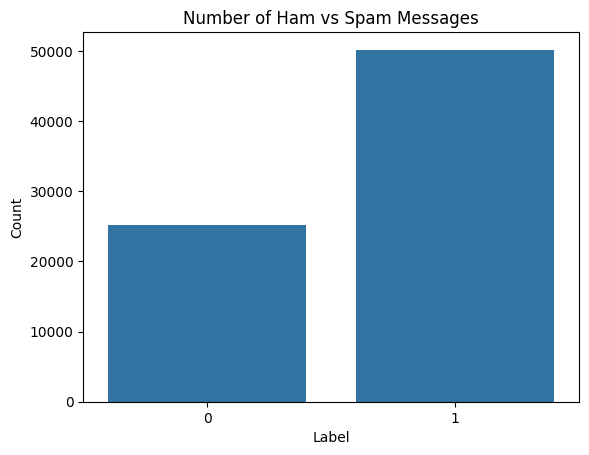

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Number of Ham vs Spam Messages")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


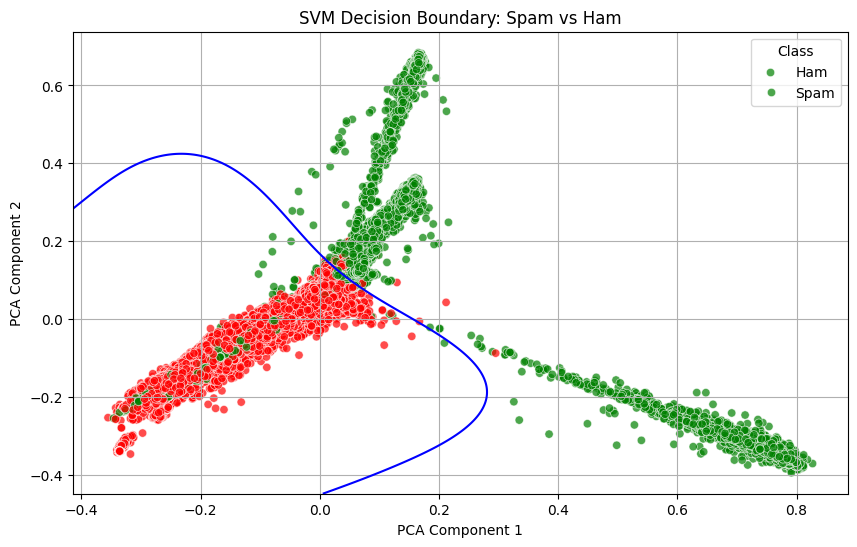

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x.toarray())


X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


clf_pca = SVC(kernel='rbf')
clf_pca.fit(X_train, y_train)



plt.figure(figsize=(10, 6))

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=['green', 'red'], alpha=0.7)
plt.legend(title='Class', labels=['Ham', 'Spam'])

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


import numpy as np
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))
Z = clf_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contour(xx, yy, Z, colors='blue', levels=[0], linestyles=['-'])

plt.title("SVM Decision Boundary: Spam vs Ham")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()